In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pnd
import scipy

import constants as cnst
from classes import SuperCycle, SuperCycleScheduler
from helpers import cycles_to_dataframe, supercycles_scenario_to_dataframe

# Calculate number of spills for SFTPRO/ECN3_D

In [2]:
SPS_typical_supercycles_scenario = {
    'AWAKE': SuperCycle('SPS', 'AWAKE', 
                        [cnst.SPS_CYCLES['AWAKE'], cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['deGauss']]),
    'AWAKE with parallel MD': SuperCycle('SPS', 'AWAKE with parallel MD', 
                                         [cnst.SPS_CYCLES['AWAKE'], cnst.SPS_CYCLES['MD parallel'], cnst.SPS_CYCLES['SFTPRO']]),
    'Dedicated MD': SuperCycle('SPS', 'Dedicated MD', 
                               [cnst.SPS_CYCLES['MD dedicated']]),
    'HiRadMat': SuperCycle('SPS', 'HiRadMat', 
                           [cnst.SPS_CYCLES['HiRadMat'], cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['deGauss']]),
    'LHC filling': SuperCycle('SPS', 'LHC filling', 
                              [cnst.SPS_CYCLES['LHC filling'], cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['deGauss']]),
    'LHC setup': SuperCycle('SPS', 'LHC setup', 
                            [cnst.SPS_CYCLES['LHC pilot'], cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['deGauss']]),
    'Physics': SuperCycle('SPS', 'Physics', 
                          [cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['deGauss']]),
    'Physics with parallel MD': SuperCycle('SPS', 'Physics with parallel MD', 
                                           [cnst.SPS_CYCLES['MD parallel'], cnst.SPS_CYCLES['SFTPRO']]),
    'Scrubbing': SuperCycle('SPS', 'Scrubbing', 
                            [cnst.SPS_CYCLES['Scrubbing'], cnst.SPS_CYCLES['SFTPRO']]),#, cnst.SPS_CYCLES['deGauss']]),
    'Thursday MD': SuperCycle('SPS', 'Thursday MD', 
                              [cnst.SPS_CYCLES['MD dedicated'], cnst.SPS_CYCLES['SFTPRO']]),#, cnst.SPS_CYCLES['deGauss']]),
}

In [3]:
df1 = supercycles_scenario_to_dataframe(SPS_typical_supercycles_scenario)
df1

/eos/home-t/tprebiba/Fellowship/00_Time_Sharing_SPS/03_protons_PSB-PS/super-cycle-modelling/helpers.py:57: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append(pnd.Series(name=supercycle,data=data))


,AWAKE,HiRadMat,LHC filling,LHC pilot,MD dedicated,MD parallel,SFTPRO,Scrubbing,deGauss,Length [s],Power [MW]
AWAKE,1,-,-,-,-,-,1,-,1,21.6,37.61
AWAKE with parallel MD,1,-,-,-,-,1,1,-,-,25.2,32.36
Dedicated MD,-,-,-,-,1,-,-,-,-,24.0,18.03
HiRadMat,-,1,-,-,-,-,1,-,1,38.4,26.26
LHC filling,-,-,1,-,-,-,1,-,1,38.4,26.57
LHC setup,-,-,-,1,-,-,1,-,1,27.6,36.84
Physics,-,-,-,-,-,-,1,-,1,14.4,40.82
Physics with parallel MD,-,-,-,-,-,1,1,-,-,18.0,32.82
Scrubbing,-,-,-,-,-,-,1,1,-,34.8,28.83
Thursday MD,-,-,-,-,1,-,1,-,-,34.8,28.83


In [4]:
SPS_future_supercycles_scenario = {
    'AWAKE': SuperCycle('SPS', 'AWAKE', 
                        [cnst.SPS_CYCLES['AWAKE'], cnst.SPS_CYCLES['AWAKE'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['deGauss']]),
    'AWAKE with parallel MD': SuperCycle('SPS', 'AWAKE with parallel MD', 
                                         [cnst.SPS_CYCLES['AWAKE'], cnst.SPS_CYCLES['AWAKE'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['MD parallel'], cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['deGauss']]),
    'Dedicated MD': SuperCycle('SPS', 'Dedicated MD', 
                               [cnst.SPS_CYCLES['MD dedicated']]),
    'HiRadMat': SuperCycle('SPS', 'HiRadMat', 
                           [cnst.SPS_CYCLES['HiRadMat'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)']]),
    'LHC filling': SuperCycle('SPS', 'LHC filling', 
                              [cnst.SPS_CYCLES['LHC filling'], cnst.SPS_CYCLES['ECN3_D (1.2s)']]),
    'LHC setup': SuperCycle('SPS', 'LHC setup', 
                            [cnst.SPS_CYCLES['LHC pilot'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)']]),
    'Physics': SuperCycle('SPS', 'Physics', 
                          [cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['deGauss'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)']]),
    'Physics with parallel MD': SuperCycle('SPS', 'Physics with parallel MD', 
                                           [cnst.SPS_CYCLES['MD parallel'], cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)']]),
    'Scrubbing': SuperCycle('SPS', 'Scrubbing', 
                            [cnst.SPS_CYCLES['Scrubbing'], cnst.SPS_CYCLES['SFTPRO']]),
    'Thursday MD': SuperCycle('SPS', 'Thursday MD', 
                              [cnst.SPS_CYCLES['MD dedicated'], cnst.SPS_CYCLES['SFTPRO'], cnst.SPS_CYCLES['deGauss'], cnst.SPS_CYCLES['ECN3_D (1.2s)'], cnst.SPS_CYCLES['ECN3_D (1.2s)']]),
}

In [5]:
df2 = supercycles_scenario_to_dataframe(SPS_future_supercycles_scenario)
df2

/eos/home-t/tprebiba/Fellowship/00_Time_Sharing_SPS/03_protons_PSB-PS/super-cycle-modelling/helpers.py:57: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append(pnd.Series(name=supercycle,data=data))


,AWAKE,ECN3_D (1.2s),HiRadMat,LHC filling,LHC pilot,MD dedicated,MD parallel,SFTPRO,Scrubbing,deGauss,Length [s],Power [MW]
AWAKE,2,3,-,-,-,-,-,1,-,1,50.4,35.52
AWAKE with parallel MD,2,3,-,-,-,-,1,1,-,1,57.6,31.43
Dedicated MD,-,-,-,-,-,1,-,-,-,-,24.0,18.03
HiRadMat,-,4,1,-,-,-,-,-,-,-,52.8,26.99
LHC filling,-,1,-,1,-,-,-,-,-,-,31.2,21.92
LHC setup,-,4,-,-,1,-,-,-,-,-,42.0,34.13
Physics,-,4,-,-,-,-,-,1,-,1,43.2,36.86
Physics with parallel MD,-,4,-,-,-,-,1,1,-,-,46.8,34.09
Scrubbing,-,-,-,-,-,-,-,1,1,-,34.8,28.83
Thursday MD,-,2,-,-,-,1,-,1,-,1,52.8,28.84


In [6]:
# Allocate time and calculate spills
machine_availability = 0.8

# only protons
supercyclescheduler1 = SuperCycleScheduler(SPS_typical_supercycles_scenario, 
                                           cnst.SPS_SUPERCYCLES_TIME_SHARING_HOURS['Protons only'], 
                                           machine_availability=machine_availability)
supercyclescheduler1.calculate_number_of_cycles()
supercyclescheduler2 = SuperCycleScheduler(SPS_future_supercycles_scenario, 
                                           cnst.SPS_SUPERCYCLES_TIME_SHARING_HOURS['Protons only'], 
                                           machine_availability=machine_availability)
supercyclescheduler2.calculate_number_of_cycles()

# with ion run
supercyclescheduler3 = SuperCycleScheduler(SPS_typical_supercycles_scenario, 
                                           cnst.SPS_SUPERCYCLES_TIME_SHARING_HOURS['With ion run'], 
                                           machine_availability=machine_availability)
supercyclescheduler3.calculate_number_of_cycles()
supercyclescheduler4 = SuperCycleScheduler(SPS_future_supercycles_scenario, 
                                           cnst.SPS_SUPERCYCLES_TIME_SHARING_HOURS['With ion run'], 
                                           machine_availability=machine_availability)
supercyclescheduler4.calculate_number_of_cycles()


In [7]:
print(supercyclescheduler2.injector_total_bps)
print(supercyclescheduler2.injector_total_free_bps)
print(supercyclescheduler2.free_bps_percentage)
print(supercyclescheduler2.number_of_cycles_played_total)

13968000.0
8973666.118622757
64.24445961213314
{'AWAKE': 83527.5, 'ECN3_D (1.2s)': 1177422.0392107891, 'HiRadMat': 9818.181818181818, 'LHC filling': 80584.6153846154, 'LHC pilot': 39908.57142857143, 'MD dedicated': 43527.27272727273, 'MD parallel': 81499.90384615386, 'SFTPRO': 244506.142090668, 'Scrubbing': 4468.9655172413795, 'deGauss': 168591.02272727274}


# Plot PoT

In [15]:
# Number of spills per year including the 80% SPS availability
spills_per_year_ecn3d = {
            'only protons': np.array([0, 
                                      supercyclescheduler2.number_of_cycles_played_total['ECN3_D (1.2s)']]),
            'with ion run': np.array([0, 
                                      supercyclescheduler4.number_of_cycles_played_total['ECN3_D (1.2s)']])
}
spills_per_year_tcc2 = {
            'only protons': np.array([supercyclescheduler1.number_of_cycles_played_total['SFTPRO'],
                                      supercyclescheduler2.number_of_cycles_played_total['SFTPRO']]),
            'with ion run': np.array([supercyclescheduler3.number_of_cycles_played_total['SFTPRO'],
                                      supercyclescheduler4.number_of_cycles_played_total['SFTPRO']])
}

# PoT
intensity_per_cycle = 4.2e13 # before SPS extraction (Figure 1 of PBC-Note 2023-001)
total_transmission_tcc2 = 0.92169 # after splitting (Table 5 of PBC-Note 2023-001)
total_transmission_ecn3d = 0.94128804 # T4 bypassed (Table 5 of PBC-Note 2023-001)
pot_ecn3d = {
            'only protons': spills_per_year_ecn3d['only protons'] * intensity_per_cycle * total_transmission_ecn3d,
            'with ion run': spills_per_year_ecn3d['with ion run'] * intensity_per_cycle * total_transmission_ecn3d
}
pot_tcc2 = {
            'only protons': spills_per_year_tcc2['only protons'] * intensity_per_cycle * total_transmission_tcc2,
            'with ion run': spills_per_year_tcc2['with ion run'] * intensity_per_cycle * total_transmission_tcc2
}

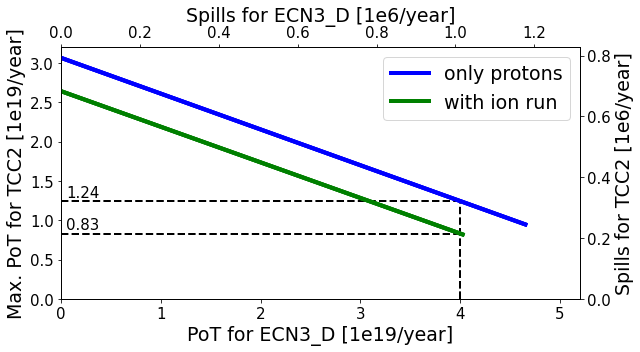

In [18]:
fig,ax = plt.subplots(1,1,figsize=(9,5),facecolor='white')
fontsize=19
ax.set_ylabel(r'Max. PoT for TCC2 [1e19/year]', fontsize=fontsize)
ax.set_xlabel(r'PoT for ECN3_D [1e19/year]', fontsize=fontsize)
ax.tick_params(labelsize=fontsize-4)
ax2 = ax.twinx()
ax2.set_ylabel(r'Spills for TCC2 [1e6/year]', fontsize=fontsize)
ax2.tick_params(labelsize=fontsize-4)
ax3 = ax.twiny()
ax3.set_xlabel(r'Spills for ECN3_D [1e6/year]', fontsize=fontsize)
ax3.tick_params(labelsize=fontsize-4)


for key,color in zip(['only protons', 'with ion run'], ['blue', 'green']):

    ax.plot(pot_ecn3d[key]*1e-19,pot_tcc2[key]*1e-19,lw=4.0,c=color, label=key)
    f1 = scipy.interpolate.interp1d(pot_ecn3d[key]*1e-19,pot_tcc2[key]*1e-19,kind='linear',fill_value='extrapolate')
    ax.plot([4,4],[0,f1(4)], lw=2., c='black', ls='--')
    ax.plot([0,4],[f1(4),f1(4)], lw=2., c='black', ls='--')
    ax.text(0.05,f1(4)+0.05,'%1.2f'%f1(4), fontsize=fontsize-4)

    ax2.plot(pot_ecn3d[key]*1e-19, spills_per_year_tcc2[key]*1e-6,lw=4.0,c=color)
    
    ax3.plot(spills_per_year_ecn3d[key]*1e-6, pot_tcc2[key]*1e-19,lw=4.0,c=color)
    
ax.set_xlim(0.,5.2)
ax.set_ylim(0.,3.2)
ax2.set_ylim(0,3.2/intensity_per_cycle/total_transmission_tcc2*1e19*1e-6)
ax3.set_xlim(0,5.2/intensity_per_cycle/total_transmission_ecn3d*1e19*1e-6)
ax.legend(loc=0, fontsize=fontsize)
fig.tight_layout()